# 02a - Model Training

## I. Preliminaries

Import the libraries and functions for model training and hyperparameter search.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import pickle


from metaboDGD.util import data, train
from metaboDGD.src import model
from metaboDGD.src.dataset import MetaboliteDataset

import yaml
plt.rcParams["font.family"] = 'Arial'

## II. Retrieve Dataframe and Cohorts

Initialize the filenames and directories of the normal and tumor sample dataframes and cohorts.

In [2]:
dir = 'outputs/'
df_normal_fname = 'CombinedDataset_CAMP_Normal.csv'
df_tumor_fname = 'CombinedDataset_CAMP_Tumor.csv'
cohorts_normal_fname = 'cohorts_Normal.pkl'
cohorts_tumor_fname = 'cohorts_Tumor.pkl'

Read the `.csv` and `.pkl` files to get the dataframes and cohorts, respectively.

In [3]:
np_normal_lbls, np_raw_normal_lbls, np_normal_log, cohorts_normal = \
    data.load_dataframe_and_cohort(dir, df_normal_fname, cohorts_normal_fname)

np_tumor_lbls, np_raw_tumor_lbls, np_tumor_log, cohorts_tumor = \
    data.load_dataframe_and_cohort(dir, df_tumor_fname, cohorts_tumor_fname)

c:\Users\Alfonso Miguel Cruz\Desktop\scDGD\metaboDGD\metaboDGD\util\data.py:267: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,

## III. Training the DGD Model

Initialize the `DataLoader` object, which stores the metabolite abundance of normal samples.

In [4]:
train_all_loader = \
    data.create_dataloaders(np_train_abun=np_normal_log,
                            np_train_lbls=np_raw_normal_lbls,
                            batch_size=256)

Initialize the DGD model.

In [5]:
config_model = yaml.safe_load(open('model.yaml', 'r'))

dgd_model = \
    model.MetaboDGD(
        **config_model
    )

Train the DGD model.

In [6]:
config_train = yaml.safe_load(open('train.yaml', 'r'))

dgd_model, train_rep, history, cm = \
    train.train_dgd(
        dgd_model=dgd_model,
        train_loader=train_all_loader,
        **config_train
    )

Cluster Acc: 0.503883495145631
Cluster Acc: 0.5281553398058253
Cluster Acc: 0.5330097087378641
Cluster Acc: 0.545631067961165
Cluster Acc: 0.5504854368932038
Cluster Acc: 0.5737864077669903
Cluster Acc: 0.5757281553398058
Cluster Acc: 0.5883495145631068
Cluster Acc: 0.6019417475728155
Cluster Acc: 0.6029126213592233
Cluster Acc: 0.6116504854368932
Cluster Acc: 0.629126213592233
Cluster Acc: 0.6359223300970874
Cluster Acc: 0.6504854368932039
Cluster Acc: 0.6563106796116505
Cluster Acc: 0.6601941747572816
Cluster Acc: 0.6912621359223301
Cluster Acc: 0.7019417475728156
Cluster Acc: 0.7271844660194174
Cluster Acc: 0.7330097087378641
Cluster Acc: 0.7679611650485437
Cluster Acc: 0.7883495145631068
Cluster Acc: 0.7922330097087379
Cluster Acc: 0.8058252427184466
Cluster Acc: 0.8194174757281554
Cluster Acc: 0.8242718446601942
Cluster Acc: 0.8436893203883495
Cluster Acc: 0.8475728155339806
Saving Model...


Get the training and validation loss, and clustering accuracy curves after training the model.

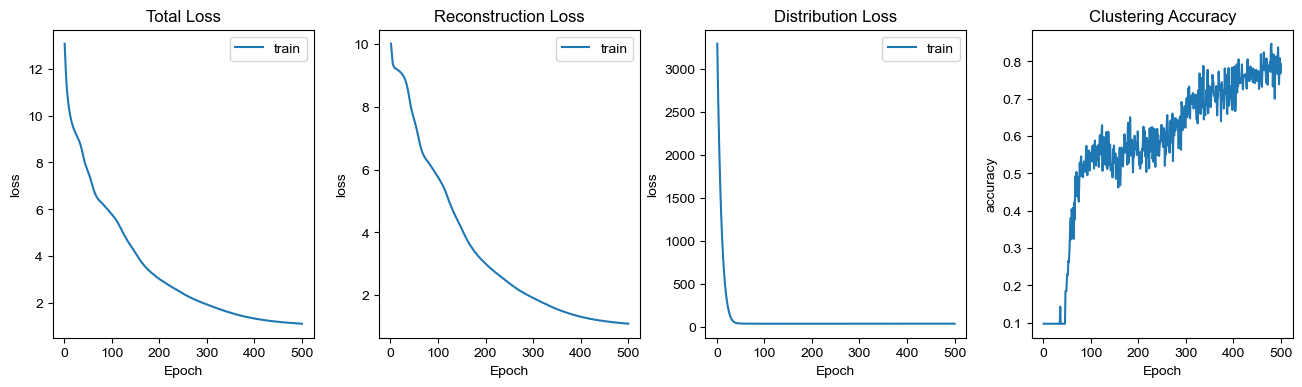

In [7]:
train.get_history_plot(history, inc_gmm_acc=True, with_val_plot=False)

In [8]:
history.tail()

,train_loss,train_recon_loss,train_dist_loss,cluster_acc,epoch
495,1.130759,1.098712,34.524409,0.738835,496
496,1.129688,1.097634,34.531211,0.784466,497
497,1.129000,1.096950,34.527020,0.808738,498
498,1.128518,1.096467,34.528033,0.767961,499
499,1.125350,1.093285,34.544065,0.792233,500


## IV. Saving the Model and Data

In [9]:
results = {
    'np_normal_lbls': np_normal_lbls,
    'np_raw_normal_lbls': np_raw_normal_lbls,
    'np_normal_log': np_normal_log,
    'cohorts_normal': cohorts_normal,
    'np_tumor_lbls': np_tumor_lbls,
    'np_raw_tumor_lbls': np_raw_tumor_lbls,
    'np_tumor_log': np_tumor_log,
    'cohorts_tumor': cohorts_tumor,
    'history': history,
    'cm': cm,
}

f = open(dir + 'results.pkl', 'wb')
pickle.dump(results, f)
f.close()

In [14]:
config_model = yaml.safe_load(open('model.yaml', 'r'))
config_train = yaml.safe_load(open('train.yaml', 'r'))

dgd_final = model.MetaboDGD(**config_model)
dgd_final.dec.load_state_dict(torch.load('torch_outputs/torch_outputs_dec.pt'))
dgd_final.gmm.load_state_dict(torch.load('torch_outputs/torch_outputs_gmm.pt'))

tumor_ds = MetaboliteDataset(
    np_mat=np_tumor_log,
    cohort_labels=np_raw_tumor_lbls,
)

config_opt = yaml.safe_load(open('opt.yaml', 'r'))

tumor_rep_final, dec_out_final = dgd_model.get_representations(tumor_ds, config_opt)
tumor_results = {
    'tumor_rep_final': tumor_rep_final.detach().numpy(),
    'dec_out_final': dec_out_final.detach().numpy()
}

f = open(dir + 'tumor_results.pkl', 'wb')
pickle.dump(tumor_results, f)
f.close()

KeyboardInterrupt: 

## V. Hyperparameter Grid Search

<!-- import pickle
def plt_load_dataframe_and_cohort(dir,
                              dataframe_fname,
                              cohort_fname):
    # Read the sample dataframe and convert to a numpy array
    df = pd.read_csv(dir + dataframe_fname)
    df.set_index('Unnamed: 0', inplace=True)
    df.index.name = None
    np_lbls = df.loc['cohort'].to_numpy()
    np_log = df.T.drop(columns=['cohort']).astype('float32').to_numpy()

    # Read the sample cohort dictionary
    fn = open(dir + cohort_fname, 'rb')
    cohorts = pickle.load(fn)
    fn.close()

    return np_lbls, np_log, cohorts

plt_np_normal_lbls, plt_np_normal_log, plt_cohorts_normal = \
    plt_load_dataframe_and_cohort(dir, df_normal_fname, cohorts_normal_fname) -->


In [17]:
from sklearn.model_selection import StratifiedKFold
histories = []
skf = StratifiedKFold(n_splits=3)
for i, (ti, vi) in enumerate(skf.split(np_normal_log, np_raw_normal_lbls)):
    train_loader, validation_loader = data.create_dataloaders(
                                            np_normal_log[ti],
                                            np_raw_normal_lbls[ti],
                                            np_normal_log[vi],
                                            np_raw_normal_lbls[vi],
                                            128
                                        )
    print(i)

    ## Initialize train
    dgd_cand = model.MetaboDGD(
        latent_dim=10,
        output_dim=np_normal_log.shape[1],
        dec_hidden_layers_dim=[1000, 5000],
        dec_output_prediction_type='mean',
        dec_output_activation_type='softplus',
        n_comp=40,
        cm_type='diagonal',
        softball_radius=5,
        softball_sharpness=10,
        gaussian_mean=-8.5,
        gaussian_stddev=0.5,
        dirichlet_alpha=2.0,
        abundance_gaussian_stddev=1.0
    )
    
    dgd_cand, _trr, _ter, history, _ = train.train_dgd(
        dgd_model=dgd_cand,
        train_loader=train_loader,
        validation_loader=validation_loader,
        n_epochs=300,
        lr_schedule_epochs=None,
        lr_schedule=[1e-4, 1e-3, 1e-2], # dec, rep, gmm
        optim_betas=[0.5, 0.8],
        wd=1e-4,
        acc_save_threshold=0.7,
        save_here=False,
    )
    histories.append(history)

0
Cluster Acc: 0.7142857142857143
Cluster Acc: 0.717201166180758
Cluster Acc: 0.7186588921282799
Cluster Acc: 0.7215743440233237
Cluster Acc: 0.7303206997084548
Cluster Acc: 0.7332361516034985
Cluster Acc: 0.7376093294460642
Cluster Acc: 0.7419825072886297
Cluster Acc: 0.7696793002915452
Cluster Acc: 0.7769679300291545
Cluster Acc: 0.8032069970845481
Cluster Acc: 0.826530612244898
1
Cluster Acc: 0.7088791848617176
Cluster Acc: 0.7612809315866085
Cluster Acc: 0.7685589519650655
Cluster Acc: 0.7758369723435226
Cluster Acc: 0.7918486171761281
Cluster Acc: 0.7991266375545851
Cluster Acc: 0.8209606986899564
Cluster Acc: 0.8413391557496361
2
Cluster Acc: 0.7045123726346434
Cluster Acc: 0.7074235807860262
Cluster Acc: 0.7467248908296943
Cluster Acc: 0.75254730713246
Cluster Acc: 0.7569141193595342
Cluster Acc: 0.759825327510917
Cluster Acc: 0.7787481804949054
Cluster Acc: 0.784570596797671
Cluster Acc: 0.7874818049490538
Cluster Acc: 0.7933042212518195
Cluster Acc: 0.7947598253275109
Cluster 

In [25]:
history_results = {
    'fold1': histories[0],
    'fold2': histories[1],
    'fold3': histories[2],
}

In [26]:
f = open(dir + 'history_results.pkl', 'wb')
pickle.dump(history_results, f)
f.close()